In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys

from aux import get_seg
from disp import set_font_size, get_line, set_plot
from time_stats import xcov_multi_with_confidence

cc = np.concatenate

SONG_FILE = 'data/simple/c_songs.npy'
COLORS = [(.7, .7, .7), 'b', 'r', (1, .5, 0)]

In [2]:
tmp = np.load(SONG_FILE, allow_pickle=True)[0]
songs = tmp['songs']
for song in songs:
    song[song == 3] = 2  # convert all p-fast to just pulse
dt = tmp['dt']
fps = tmp['fps']

## Autocovariances

$$C_i(\Delta t) = \frac{1}{T_i(\Delta t)-1} \sum_{t=1}^{T_i(\Delta t)} [(x_i(t) - \mu_{x_i(t)})(x_i(t+\Delta t) - \mu_{x_i(t+\Delta t)})]$$

$$C_i^*(\Delta t) = C_i(\Delta t) / C_i(0)$$

$$\textrm{Autocovariance}(\Delta t) = \sum_i C_i^*(\Delta t)\frac{T_i}{\sum_i T_i}$$

Aggregated songs

In [3]:
lag_bak = int(round(30*fps))
lag_fwd = int(round(30*fps))

# two-point correlation func for singing vs non-singing
sin_bnry = [(s == 1).astype(float) for s in songs]
pls_bnry = [(s == 2).astype(float) for s in songs]
cov_sng, _, _, _ = xcov_multi_with_confidence(sin_bnry, pls_bnry, lag_backward=lag_bak, lag_forward=lag_fwd, pre_norm=False, scale=True)

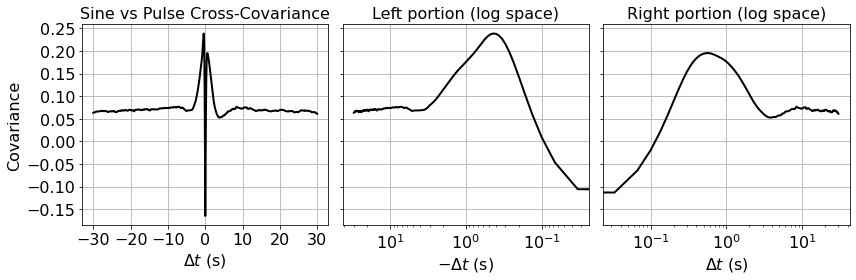

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True, tight_layout=True)
t_cov = np.arange(-lag_bak, lag_fwd) * dt

axs[0].plot(t_cov, cov_sng, lw=2, c='k')
set_plot(axs[0], y_label='Covariance', title='Sine vs Pulse Cross-Covariance')

axs[1].semilogx(-t_cov[t_cov <= 0], cov_sng[t_cov <= 0], lw=2, c='k')
axs[1].invert_xaxis()
set_plot(axs[1], title='Left portion (log space)')

axs[2].semilogx(t_cov[t_cov >= 0], cov_sng[t_cov >= 0], lw=2, c='k')
set_plot(axs[2], title='Right portion (log space)')

for ax in axs:
    if ax is axs[1]:
        ax.set_xlabel('$-\Delta t$ (s)')
    else:
        ax.set_xlabel('$\Delta t$ (s)')
    ax.grid()
    set_plot(ax, font_size=16)
    
fig.savefig('supp/9_sine_pulse_xcov.svg')